In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv(r"C:\Users\Afnan\Desktop\ML MID\dataset.csv")

In [6]:
dataset

,ID,Name,Gender,Previous_Symptom,Status,Age,Weight
0,1,Mahir,M,HA,no,23.0,54.0
1,2,Afnan,M,V,yes,23.0,68.0
2,3,Bashar,M,HA,yes,24.0,72.0
3,4,Mahafuj,M,BP,no,25.0,76.0
4,5,Tasin,M,HBP,no,26.0,NaN
5,6,Shahid,M,HA,no,NaN,75.0
6,7,Epu,M,V,yes,23.0,56.0
7,8,Tuhin,M,BP,yes,NaN,57.0
8,9,Ifaz,M,None,yes,25.0,NaN
9,10,Salehin,M,BP,no,32.0,81.0


In [7]:
x = dataset.iloc[:,:7].values
print(x)

y = dataset.iloc[:,4].values
y

[[1 'Mahir' 'M' 'HA' 'no' 23.0 54.0]
 [2 'Afnan' 'M' 'V' 'yes' 23.0 68.0]
 [3 'Bashar ' 'M' 'HA' 'yes' 24.0 72.0]
 [4 'Mahafuj' 'M' 'BP' 'no' 25.0 76.0]
 [5 'Tasin' 'M' 'HBP' 'no' 26.0 nan]
 [6 'Shahid' 'M' 'HA' 'no' nan 75.0]
 [7 'Epu' 'M' 'V' 'yes' 23.0 56.0]
 [8 'Tuhin' 'M' 'BP' 'yes' nan 57.0]
 [9 'Ifaz' 'M' 'None' 'yes' 25.0 nan]
 [10 'Salehin' 'M' 'BP' 'no' 32.0 81.0]]


array(['no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no'],
      dtype=object)

In [8]:
x[:,5:7]

array([[23.0, 54.0],
       [23.0, 68.0],
       [24.0, 72.0],
       [25.0, 76.0],
       [26.0, nan],
       [nan, 75.0],
       [23.0, 56.0],
       [nan, 57.0],
       [25.0, nan],
       [32.0, 81.0]], dtype=object)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
imputer = imputer.fit(x[:,5:7])
x[:,5:7] = imputer.transform(x[:,5:7])

x

array([[1, 'Mahir', 'M', 'HA', 'no', 23.0, 54.0],
       [2, 'Afnan', 'M', 'V', 'yes', 23.0, 68.0],
       [3, 'Bashar ', 'M', 'HA', 'yes', 24.0, 72.0],
       [4, 'Mahafuj', 'M', 'BP', 'no', 25.0, 76.0],
       [5, 'Tasin', 'M', 'HBP', 'no', 26.0, 67.375],
       [6, 'Shahid', 'M', 'HA', 'no', 25.125, 75.0],
       [7, 'Epu', 'M', 'V', 'yes', 23.0, 56.0],
       [8, 'Tuhin', 'M', 'BP', 'yes', 25.125, 57.0],
       [9, 'Ifaz', 'M', 'None', 'yes', 25.0, 67.375],
       [10, 'Salehin', 'M', 'BP', 'no', 32.0, 81.0]], dtype=object)

In [10]:
x[:,1:5]

array([['Mahir', 'M', 'HA', 'no'],
       ['Afnan', 'M', 'V', 'yes'],
       ['Bashar ', 'M', 'HA', 'yes'],
       ['Mahafuj', 'M', 'BP', 'no'],
       ['Tasin', 'M', 'HBP', 'no'],
       ['Shahid', 'M', 'HA', 'no'],
       ['Epu', 'M', 'V', 'yes'],
       ['Tuhin', 'M', 'BP', 'yes'],
       ['Ifaz', 'M', 'None', 'yes'],
       ['Salehin', 'M', 'BP', 'no']], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x[:,1]=LE.fit_transform(x[:,1])
x[:,2]=LE.fit_transform(x[:,2])
x[:,3]=LE.fit_transform(x[:,3])
x[:,4]=LE.fit_transform(x[:,4])

x

array([[1, 5, 0, 1, 0, 23.0, 54.0],
       [2, 0, 0, 4, 1, 23.0, 68.0],
       [3, 1, 0, 1, 1, 24.0, 72.0],
       [4, 4, 0, 0, 0, 25.0, 76.0],
       [5, 8, 0, 2, 0, 26.0, 67.375],
       [6, 7, 0, 1, 0, 25.125, 75.0],
       [7, 2, 0, 4, 1, 23.0, 56.0],
       [8, 9, 0, 0, 1, 25.125, 57.0],
       [9, 3, 0, 3, 1, 25.0, 67.375],
       [10, 6, 0, 0, 0, 32.0, 81.0]], dtype=object)

In [12]:
y=LE.fit_transform(y)

In [13]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

x_train

array([[1, 5, 0, 1, 0, 23.0, 54.0],
       [8, 9, 0, 0, 1, 25.125, 57.0],
       [3, 1, 0, 1, 1, 24.0, 72.0],
       [4, 4, 0, 0, 0, 25.0, 76.0],
       [7, 2, 0, 4, 1, 23.0, 56.0],
       [10, 6, 0, 0, 0, 32.0, 81.0],
       [9, 3, 0, 3, 1, 25.0, 67.375]], dtype=object)

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [17]:
LR.fit(x_train,y_train)

LinearRegression()

In [19]:
train_x_pred = LR.predict(x_train)

train_x_pred

array([-2.61727046e-16,  1.00000000e+00,  1.00000000e+00, -8.59429772e-17,
        1.00000000e+00, -1.52803542e-15,  1.00000000e+00])

In [20]:
test_x_pred = LR.predict(x_test)

test_x_pred

array([-6.61886454e-15,  1.00000000e+00, -3.46045356e-15])

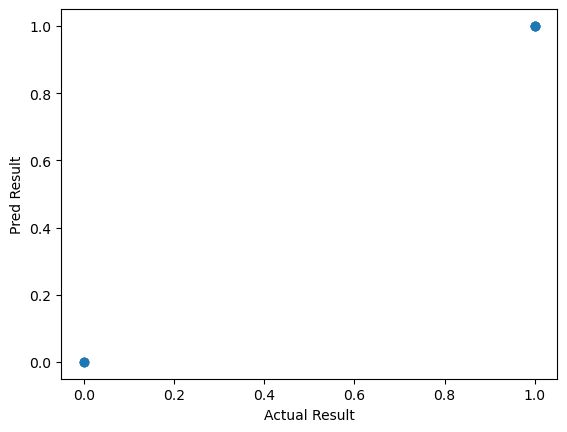

In [21]:
plt.scatter(y_train,train_x_pred)
plt.xlabel("Actual Result")
plt.ylabel("Pred Result")
plt.show()

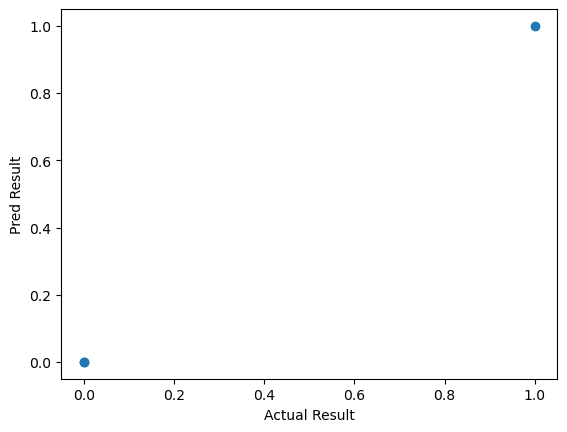

In [22]:
plt.scatter(y_test,test_x_pred)
plt.xlabel("Actual Result")
plt.ylabel("Pred Result")
plt.show()

In [ ]:
#L-6

from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()

In [ ]:
cls.fit(x,y)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,cls.predict(x)))
print(confusion_matrix(y,cls.predict(x)))

In [ ]:
cf = confusion_matrix(y,cls.predict(x))
cf_df = pd.DataFrame(cf,
                    index=[0,1],
                    columns=[0,1])

In [ ]:
import seaborn as sns

sns.heatmap(cf,annot=True)
plt.title("C_M")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()